In [1]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

We'll load up the MNIST data set (same as in the tensorflow experiment)

In [2]:
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = keras.datasets.mnist.load_data()

Convert data to Keras format which normalizing the pixel to the 0-1 range

In [3]:
train_images = mnist_train_images.reshape(60000,784)
test_images = mnist_test_images.reshape(10000,784)
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255
test_images /= 255

Convert the 0-9 labels to "one-hot" format

In [4]:
train_labels = keras.utils.to_categorical(mnist_train_labels, 10)
test_labels = keras.utils.to_categorical(mnist_test_labels, 10)

let's see how it looks like

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


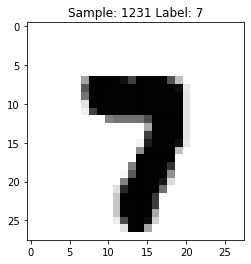

In [6]:
import matplotlib.pyplot as plt
def display_sample(num):
    #Print the one-hot array of this sample's label
    print(train_labels[num])
    label = train_labels[num].argmax(axis = 0)
    #reshape the 768 values to a 28x28 image
    image = train_images[num].reshape([28,28])
    plt.title('Sample: %d Label: %d' % (num, label))
    plt.imshow(image, cmap = plt.get_cmap('gray_r'))
    plt.show()

display_sample(1231)

Test topology #2 - by developer

In [16]:
model = Sequential()
model.add(Dense(512, activation = 'relu', input_shape = (784,))) #relu(x) = max(x,0)
model.add(Dropout(0.2)) #randomly sets input units to 0 with frequency rate to prevent overfitting
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax')) #softmax(x_i) = exp(x_i)/sum(exp(x))

Test topology #1 - basic

In [9]:
model = Sequential() #adding LTUs sequentially
model.add(Dense(512, activation = 'relu', input_shape = (784,)))
    #one LTU: 512 neurons, 
model.add(Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = RMSprop(),
             metrics = ['accuracy'])
history = model.fit(train_images, train_labels,
                   batch_size = 100,
                   epochs = 10,
                   verbose = 2,
                   validation_data = (test_images, test_labels))

Epoch 1/10
600/600 - 7s - loss: 0.2340 - accuracy: 0.9292 - val_loss: 0.1141 - val_accuracy: 0.9645
Epoch 2/10
600/600 - 7s - loss: 0.1033 - accuracy: 0.9692 - val_loss: 0.0957 - val_accuracy: 0.9715
Epoch 3/10
600/600 - 7s - loss: 0.0793 - accuracy: 0.9765 - val_loss: 0.0780 - val_accuracy: 0.9773
Epoch 4/10
600/600 - 7s - loss: 0.0636 - accuracy: 0.9817 - val_loss: 0.0818 - val_accuracy: 0.9810
Epoch 5/10
600/600 - 7s - loss: 0.0537 - accuracy: 0.9844 - val_loss: 0.0913 - val_accuracy: 0.9784
Epoch 6/10
600/600 - 7s - loss: 0.0478 - accuracy: 0.9862 - val_loss: 0.0814 - val_accuracy: 0.9815
Epoch 7/10
600/600 - 7s - loss: 0.0426 - accuracy: 0.9882 - val_loss: 0.0887 - val_accuracy: 0.9803
Epoch 8/10
600/600 - 7s - loss: 0.0397 - accuracy: 0.9891 - val_loss: 0.0868 - val_accuracy: 0.9837
Epoch 9/10
600/600 - 7s - loss: 0.0386 - accuracy: 0.9897 - val_loss: 0.0933 - val_accuracy: 0.9802
Epoch 10/10
600/600 - 7s - loss: 0.0337 - accuracy: 0.9908 - val_loss: 0.1070 - val_accuracy: 0.9803

In [13]:
score = model.evaluate(test_images, test_labels, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07712988555431366
Test accuracy: 0.9814000129699707


visualize what went wrong

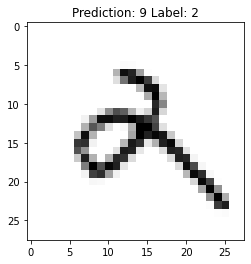

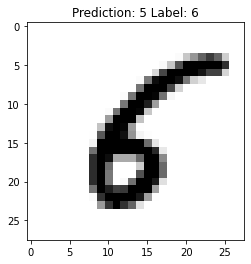

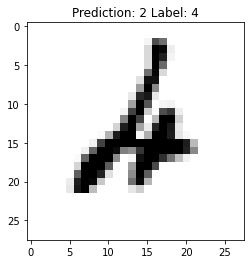

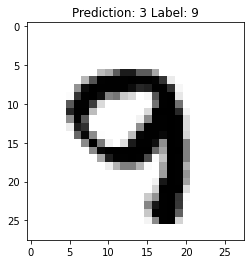

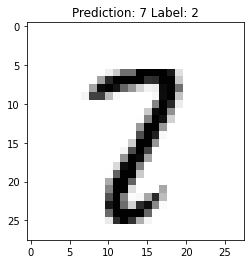

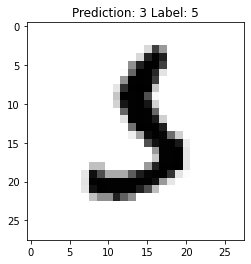

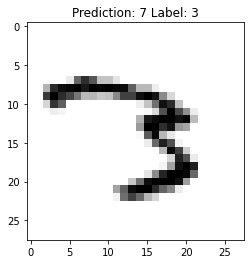

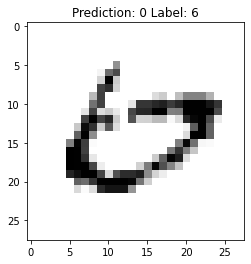

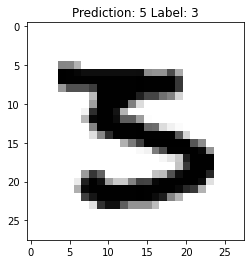

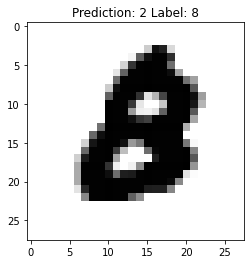

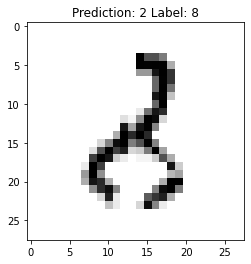

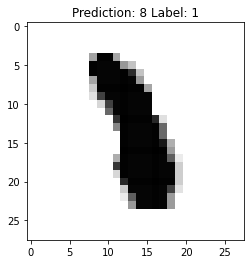

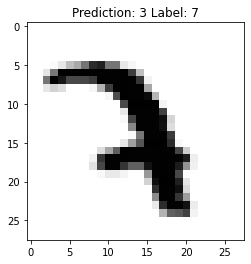

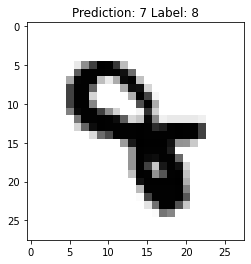

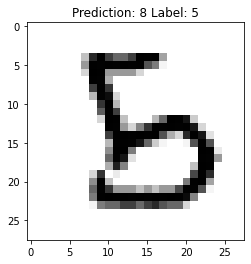

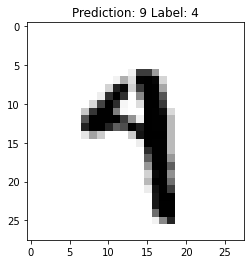

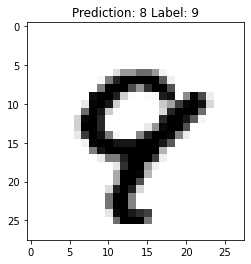

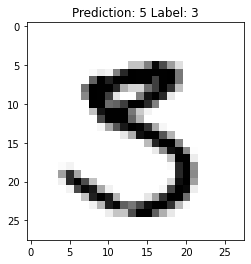

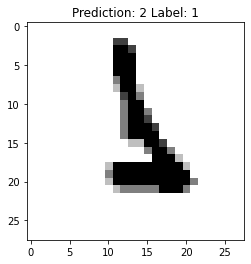

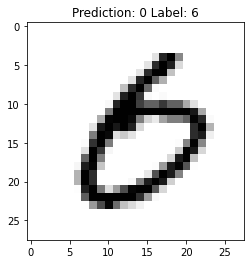

In [15]:
for x in range(1000):
    test_image = test_images[x,:].reshape(1,784)
    predicted_cat = model.predict(test_image).argmax()
    label = test_labels[x].argmax()
    if (predicted_cat != label):
        plt.title('Prediction: %d Label: %d' % (predicted_cat, label))
        plt.imshow(test_image.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
        plt.show()